In [137]:
#link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [139]:
df=pd.read_csv("car data.csv")

In [140]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [141]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [142]:
print(df["Owner"].value_counts())
print(df["Car_Name"].value_counts())
print(df["Fuel_Type"].value_counts())
print(df["Seller_Type"].value_counts())
print(df["Transmission"].value_counts())



0    290
1     10
3      1
Name: Owner, dtype: int64
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [143]:
df.replace({"Fuel_Type":{"Petrol":0, "Diesel":1, "CNG":2}},inplace=True)
df.replace({"Transmission":{"Manual":0, "Automatic":1}},inplace=True)
df.replace({"Seller_Type":{"Dealer":0, "Individual":1, }},inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [144]:
Car_Name=df["Car_Name"]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Car_Name = le.fit_transform(Car_Name)

Car_Name        #98 diffirent types car in 300 row. 

array([90, 93, 68, 96, 92, 95, 68, 91, 68, 68, 62, 68, 68, 76, 73, 76, 76,
       76, 96, 93, 63, 85, 93, 63, 96, 92, 92, 92, 63, 68, 90, 90, 92, 76,
       73, 93, 73,  0, 63, 93, 65, 63, 93, 73, 89, 68, 90, 96, 76, 68, 81,
       81, 86, 81, 86, 71, 77, 71, 78, 81, 71, 77, 81, 81, 81, 80, 86, 81,
       71, 71, 80, 71, 71, 80, 77, 78, 71, 70, 71, 81, 71, 79, 86, 86, 86,
       67, 88, 71, 80, 78, 71, 86, 86, 81, 71, 71, 86, 71, 71, 81, 49, 56,
       42, 11, 46, 43, 40, 48, 48, 46, 42, 48, 41, 44, 46, 46, 46, 49, 46,
       49, 17, 48, 45, 46, 47, 47,  6,  4, 32, 60, 32, 58,  6,  6, 51, 14,
       37, 20, 32,  7, 37,  5, 57, 57, 12, 51, 20, 60, 15, 15, 52, 26, 16,
       16, 61, 31, 54, 60, 38, 31,  8, 52, 16,  7, 28,  1, 25, 51, 34, 28,
       59, 25, 13,  2, 35, 22, 39, 30, 53, 39, 23, 27, 33,  9, 14, 50, 55,
       36, 21, 29, 14, 10, 24, 19, 18,  3,  1, 36, 10, 33, 14, 84, 82, 83,
       75, 82, 97, 82, 84, 82, 83, 74, 72, 84, 82, 94, 75, 75, 94, 94, 75,
       84, 84, 94, 94, 83

In [145]:
df2=df.drop(["Car_Name"],axis=1)
df2

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


In [146]:
Y=df2["Selling_Price"]
X=df2.drop(["Selling_Price"],axis=1)
X,Y

(     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
 0    2014           5.59       27000          0            0             0   
 1    2013           9.54       43000          1            0             0   
 2    2017           9.85        6900          0            0             0   
 3    2011           4.15        5200          0            0             0   
 4    2014           6.87       42450          1            0             0   
 ..    ...            ...         ...        ...          ...           ...   
 296  2016          11.60       33988          1            0             0   
 297  2015           5.90       60000          0            0             0   
 298  2009          11.00       87934          0            0             0   
 299  2017          12.50        9000          1            0             0   
 300  2016           5.90        5464          0            0             0   
 
      Owner  
 0        0  
 1        0  
 2      

In [147]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [148]:

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 7.15109403e+00, -4.23597596e-01,  4.29317385e+00,  8.65452674e+00,
        1.41567775e+01,  4.90831522e+00,  3.53467957e+00,  1.44629982e+00,
        5.38203747e+00,  4.66822329e+00,  2.25436652e+00,  1.62369073e+00,
        5.10340136e+00,  7.63583986e+00,  8.25142614e+00,  1.42107233e+01,
        7.39937849e+00,  4.27934188e+00, -4.57454953e-01,  2.39120792e+00,
        5.03077854e+00,  3.81276384e+00,  6.49858604e+00,  8.14607684e+00,
       -1.93080143e+00,  1.94357130e+00, -8.19148942e-01,  8.21481213e-01,
        2.20224230e-03,  7.20531002e+00,  3.07786554e+00,  7.05021502e+00,
        7.21562252e-01,  7.54652493e+00,  3.56884281e+00,  1.81884781e+00,
        5.60660404e+00,  6.59162587e+00, -2.73350542e+00,  8.75806929e+00,
        8.84199116e+00,  1.99052379e+01,  4.40391107e+00,  3.86694215e+00,
        6.26329178e+00,  9.51709125e+00,  1.22523783e-01,  1.68957499e+00,
        5.17960418e+00,  6.95950453e+00,  8.16014675e+00,  4.19806813e+00,
        4.92838461e+00,  

In [149]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
r2_score(y_test, y_pred)

2.1885564456578535


0.9134181721224441

In [150]:
import statsmodels.api as sm

X_l= X.values

X_l=np.array(X_l,dtype=float)
model=sm.OLS(Y,X_l).fit()
print(model.summary())



                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              450.8
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                   4.10e-153
Time:                        15:59:21   Log-Likelihood:                         -637.48
No. Observations:                 301   AIC:                                      1289.
Df Residuals:                     294   BIC:                                      1315.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<AxesSubplot:>

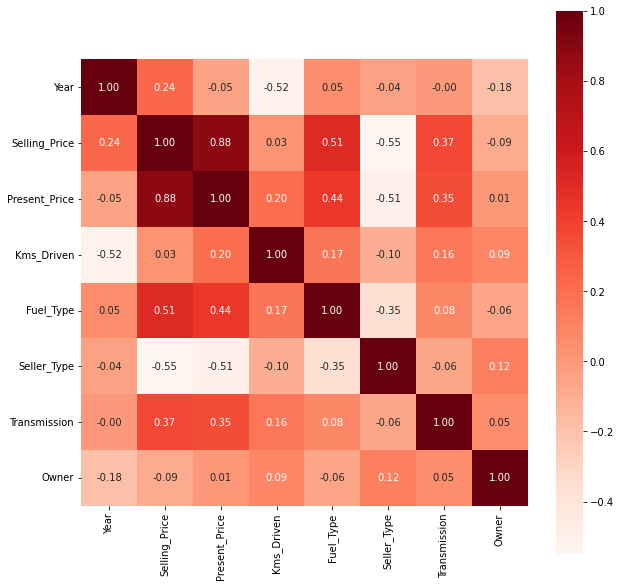

In [151]:
correlation=df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".2f",annot=True, annot_kws={"size":10},cmap="Reds")

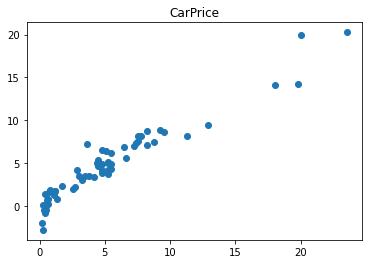

In [156]:
plt.scatter(y_test,y_pred)

plt.title("CarPrice")
plt.show()